## Class 1

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1
How do you handle duplicate values in a dataset in Python?

In [16]:
# First step: clarification
# What do you mean by handle? Remove?
# What is the data structure? Duplicate rows/columns in a table? Or duplicate values in a list?

# Second step: solve
# if in a numpy array
a = np.array([1,2,2,3,3])
a_dedupe = np.unique(a)
print(a_dedupe)

# if in a data frame
b = pd.DataFrame({"name": ["a", "a", "b", "c"], 
                  "rank": [1, 1, 2, 3]},
                columns = ["name", "rank"])
b_dedupe = b.drop_duplicates(keep = "first")
print(b_dedupe)

[1 2 3]
  name  rank
0    a     1
2    b     2
3    c     3


### Question 2
You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? 

In [ ]:
# Step 1: Clarification
# Confirm definition of acceptance rate
# Overall: Non-deduped? (the same requester sent requests to the same person several times) Deduped by user?
# Step 2: Draw the table schema - speak out your thought process

In [43]:
# assume that acceptance rate is deduped by user
friend_request = pd.DataFrame(
    {
        "requester_id": [100001, 100001, 100003, 100004, 100004],
        "time": ["2017-06-05", "2017-06-05", "2017-06-06", "2017-06-07", "2017-06-08"],
        "sent_to_id" :[200001, 200002, 200003, 200004, 200004]
    },
    columns = ["requester_id", "time", "sent_to_id"]
)
friend_request

,requester_id,time,sent_to_id
0,100001,2017-06-05,200001
1,100001,2017-06-05,200002
2,100003,2017-06-06,200003
3,100004,2017-06-07,200004
4,100004,2017-06-08,200004


In [69]:
request_accepted = pd.DataFrame(
    {
        "time": ["2017-06-05", "2017-06-06", "2017-06-08"],
        "acceptor_id": [200001, 200003, 200004],
        "requester_id": [100001, 100003, 100004]
    },
    columns = ["time", "acceptor_id", "requester_id"]
)
request_accepted

,time,acceptor_id,requester_id
0,2017-06-05,200001,100001
1,2017-06-06,200003,100003
2,2017-06-08,200004,100004


In [74]:
# Python solution
merged = pd.merge(friend_request, request_accepted, how="left", left_on=["requester_id", "sent_to_id"], right_on=["requester_id", "acceptor_id"])
merged = merged.drop_duplicates(["requester_id", "sent_to_id"], keep = "last")
merged

,requester_id,time_x,sent_to_id,time_y,acceptor_id
0,100001,2017-06-05,200001,2017-06-05,200001.0
1,100001,2017-06-05,200002,NaN,NaN
2,100003,2017-06-06,200003,2017-06-06,200003.0
4,100004,2017-06-08,200004,2017-06-08,200004.0


In [75]:
acceptance_rate = merged["acceptor_id"].count()/merged["requester_id"].count()
acceptance_rate

0.75

In [ ]:
# SQL solution
SELECT n_accepted/n_request AS acceptance_rate
FROM (
    SELECT COUNT(fr.requester_id) AS n_request, COUNT(ra.acceptor_id) AS n_accepted
    FROM friend_request fr
    LEFT JOIN request_accepted ra ON fr.requester_id=ra.requester_id AND fr.sent_to_id=ra.acceptor_id
)

### Question 3
Do some research and summarize the business model of your dream company, or company that you interview with.<br>
**Company:**<br>
Curriculum Associates<br>
**What is the product:**<br>
i-Ready Diagnostic & Instruction<br>
**Who are the customer:**<br>
K-12 students, teachers, school administrators, school district administrators<br>
**How do they make money:**<br>
Sell subscriptions of i-Ready<br>
**Why do you want to work for this company?**<br>
Great product; great culture; mission aligns with my passion for edtech<br>
**(Optional) If you were CEO, what would you do to increase company’s revenue in the next 5 years?**<br>
Increase sales (expand to more schools)

## Class 2

In [76]:
# read data
file_location = "E:/BitTiger BA501/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)

In [77]:
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


### Question 1
Using our data, draw a histogram which plots both US and JP data on the same plot.

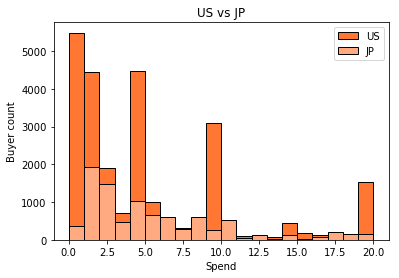

In [88]:
my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]

fig, ax = plt.subplots() 
ax.hist(my_series_us, bins=20, color = "#ff7733", edgecolor="black", label="US")
ax.hist(my_series_jp, bins=20, color = "#ffaa80", edgecolor="black", label='JP')

ax.set_title("US vs JP")
ax.set_ylabel("Buyer count") 
ax.set_xlabel("Spend")

plt.legend(["US", "JP"], loc="upper right")

### Question 2
Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called PrintCumulativeTimeSeries(). 
Specifically:
 
The function takes three inputs:
* experiment_id
* country
* vertical
 
The function produces two outputs:
* A time series chart showing the cumulative uplift (hint: search for cumsum)
* Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %

In [ ]:
# Why people care more about cumulative?
# Daily data has too much noise, e.g. sales promotion on one day
# Hard to compare

In [120]:
import datetime

In [121]:
def get_series(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby("date")["spend_usd"].sum()
    cumulative_series = series.cumsum(axis=0)
    return(cumulative_series)

In [130]:
# for any two series, plot the time series
def plot_series(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    
    ax = df.plot()
    
    ax.set_title("Cumulative Time Series")
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative spend")
    ax.grid(True, which="both")
    
    plt.gcf().autofmt_xdate()

In [131]:
def print_cumulative_time_series(my_data, experiment_ids):
    # make sure our x-axis is consistent
    date_series = my_data.date
    index_series = np.unique(date_series) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    experiment_series = get_series(my_data, experiment_ids[0])
    control_series = get_series(my_data, experiment_ids[1])
    
    plot_series(index_series, experiment_series, control_series)    

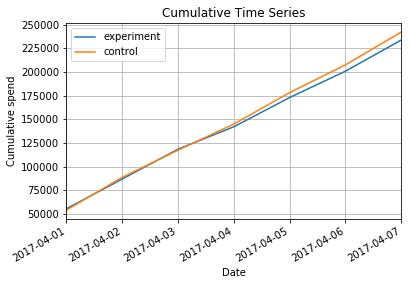

In [132]:
print_cumulative_time_series(my_data, [12624548, 12624549])

In [ ]:
### Question 3
(Optional) Write a function that can plot 10 (instead of 2) time series in our data.